<a href="https://colab.research.google.com/github/brl0/brl0-stuff/blob/master/nlp_mccabe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic NLP and text analysis on article "A Complexity Measure" by THOMAS J. McCABE.

In [0]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)
!ln -s /content/gdrive/My\ Drive/ /content/g
gdrive = "/content/g/"

In [0]:
import pandas as pd
import operator
from pathlib import Path
from nltk import sent_tokenize, word_tokenize
from functools import reduce
from collections import Counter
from unicodedata import normalize

from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))

from string import punctuation
stoplist = stoplist.union(set(punctuation))

from functools import partial
normalizer = partial(normalize, 'NFKD')

from nltk.stem import PorterStemmer
porter = PorterStemmer()

import nltk
nltk.download('all')

In [0]:
article = Path('/content/gdrive/My Drive/Documents/Read/mccabe.pdf.txt').read_text(errors='ignore')

In [0]:
words = map(porter.stem, map(str.casefold, map(normalizer, reduce(operator.iadd, map(word_tokenize, reduce(operator.iadd, map(sent_tokenize, article.split('\n'))))))))
words = Counter({_[0]: _[1] for _ in 
                 Counter(words).most_common() if _[0] not in stoplist and _[0].isalpha() and len(_[0]) > 2 and _[1] > 2}).most_common()
words

[('program', 87),
 ('complex', 81),
 ('graph', 63),
 ('structur', 47),
 ('control', 39),
 ('thi', 33),
 ('path', 33),
 ('number', 32),
 ('one', 31),
 ('test', 30),
 ('follow', 27),
 ('node', 26),
 ('result', 25),
 ('flow', 24),
 ('measur', 22),
 ('use', 20),
 ('loop', 17),
 ('exampl', 16),
 ('nonstructur', 16),
 ('softwar', 16),
 ('cyclomat', 16),
 ('reduc', 15),
 ('connect', 15),
 ('programm', 15),
 ('case', 15),
 ('construct', 13),
 ('would', 13),
 ('branch', 13),
 ('entri', 13),
 ('exit', 13),
 ('calcul', 13),
 ('illustr', 12),
 ('independ', 12),
 ('sever', 11),
 ('onli', 11),
 ('theorem', 11),
 ('ani', 11),
 ('fortran', 10),
 ('notic', 10),
 ('subroutin', 10),
 ('item', 10),
 ('also', 9),
 ('basi', 9),
 ('set', 9),
 ('gener', 9),
 ('block', 9),
 ('assum', 9),
 ('comput', 9),
 ('two', 9),
 ('sinc', 9),
 ('decis', 8),
 ('system', 8),
 ('need', 8),
 ('mathemat', 8),
 ('compon', 8),
 ('code', 8),
 ('predic', 8),
 ('unstructur', 8),
 ('search', 8),
 ('present', 7),
 ('size', 7),
 ('deve

In [0]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

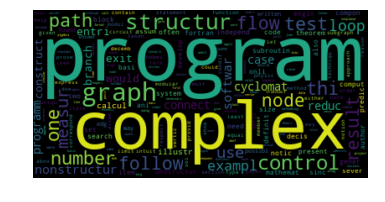

In [0]:
wordcloud = WordCloud().generate_from_frequencies(dict(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [0]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE NO/NNP)
(NE McCABE/NNP Abstract/NNP)
(NE Index/NN TennsBasis/NNP)
(NE INTRODUCTION/NN HERE/NNP)
(NE Manuscript/NNP)
(NE Defense/NNP)
(NE National/NNP Security/NNP Agency/NNP)
(NE COMPLEXITY/NNP)
(NE Berge/NNP)
(NE Ledgard/NNP)
(NE Appendix/NNP)
(NE Linear/JJ)
(NE CONTROL/NNP)
(NE COMPLEXITY/NNP)
(NE Fortran/NNP)
(NE FLOW/NNP)
(NE APL/NNP)
(NE Fortran/NNP)
(NE FLOW/NNP)
(NE GOTO/NNP)
(NE LABELS/NNP)
(NE DO/NNP)
(NE FLOW/NNP)
(NE FLOW/NNP)
(NE IMPLICIT/NNP)
(NE COMMON/NNP)
(NE NCHARS/NNP)
(NE NWORDS/NNP)
(NE INHEAD/NNP)
(NE TYPE/NNP)
(NE NAMDML/NNP)
(NE CALL/NNP)
(NE ICHAN/NNP)
(NE Section/NNP IV/NNP)
(NE NWORDS/NNP)
(NE CONTINUE/NNP CALL/NNP)
(NE ITRANS/NNP)
(NE TOO/NNP)
(NE WORDS/NNP)
(NE READ/NNP ERROR/NNP)
(NE STRUCTURE/NNP)
(NE SEE/NNP)
(NE COOPER/NNP)
(NE FLOW/NNP)
(NE DATA/NNP)
(NE FLOW/NNP)
(NE CDC6600/NNP)
(NE Section/NNP VII/NNP)
(NE FLOW/NNP)
(NE DEC/NNP)
(NE DECOMPOSITION/NNP)
(NE Recall/NN)
(NE MUAUB/NNP)
(NE MUAUB/NNP)
(NE MUAUB/NNP)
(NE Euler/NNP)
(NE Knuth/NNP)
(NE Ra